Information Theory Basics
1. P(x) = [1/4, 1/4, 1/4, 1/4]

   P(y) = [1/4, 1/4, 1/4, 1/4]

   H(X) = -4 * (1/4 * log_2(1/4)) = 2

   H(Y) = -4 * (1/4 * log2(1/4)) = 2

   H(X, Y) = ∑ P(x, y) * log2(P(x, y)) = 6/8 + 6/4 + 5/8 + 1/2 = 3.375

   H(X|Y) = H(X,Y) - H(Y) = 3.375 - 2 = 1.375

   H(Y|X) = H(X,Y) - H(X) = 3.375 - 2 = 1.375

   Yes, H(X|Y) = H(Y|X)


2. H(X) - H(X|Y) = 0.625

   H(Y) - H(Y|X) = 0.625

   Yes, H(X) - H(X|Y) = H(Y) - H(Y|X)


3. I(X, Y) = H(X) + H(Y) - H(X, Y) = 2 + 2 - 3.375 = 0.625

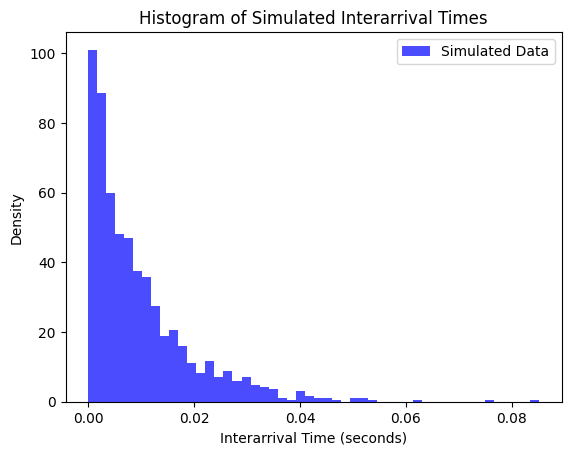

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Lambda = 100
n = 1000

interarrival_times = np.random.exponential(1 / Lambda, size=n)

plt.hist(interarrival_times, bins=50, density=True, alpha=0.7, color='blue', label="Simulated Data")
plt.xlabel("Interarrival Time (seconds)")
plt.ylabel("Density")
plt.title("Histogram of Simulated Interarrival Times")
plt.legend()
plt.show()


Estimated lambda after SGD: 88.8647


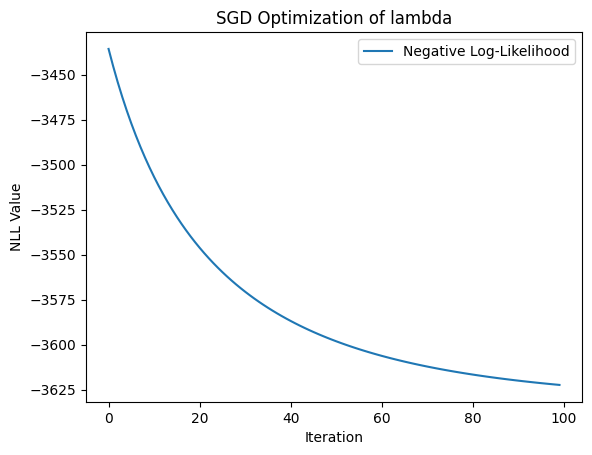

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def negative_log_likelihood(lambda_est, data):
    return -len(data) * np.log(lambda_est) + lambda_est * np.sum(data)

def sgd_mle(data, lambda_init=50, lr=0.1, num_iterations=100):
    lambda_est = lambda_init
    n = len(data)
    losses = []

    for i in range(num_iterations):
        grad = -n / lambda_est + np.sum(data)
        lambda_est -= lr * grad
        lambda_est = max(lambda_est, 1e-6)
        losses.append(negative_log_likelihood(lambda_est, data))

    return lambda_est, losses

lambda_est, loss_values = sgd_mle(interarrival_times)

print(f"Estimated lambda after SGD: {lambda_est:.4f}")

plt.plot(loss_values, label="Negative Log-Likelihood")
plt.xlabel("Iteration")
plt.ylabel("NLL Value")
plt.title("SGD Optimization of lambda")
plt.legend()
plt.show()


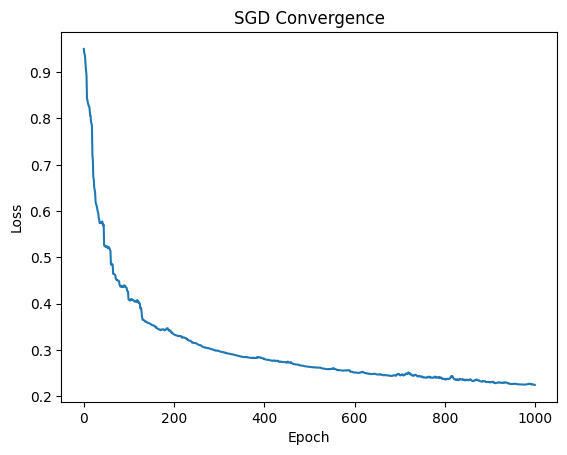

Final weights: [ 0.424862   -0.3259838  -0.62715559 -0.20133506 -0.51787949  0.42221836]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
m = 5000
x = np.linspace(0, 1, m)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.3, size=m)

M = 5
X = np.vstack([x**i for i in range(M+1)]).T

w = np.random.randn(M+1)
lr = 0.01
lambda_ = 0.1
epochs = 1000
loss_history = []

for epoch in range(epochs):
    i = np.random.randint(m)
    xi = X[i]
    yi = y[i]
    prediction = np.dot(xi, w)

    gradient = (prediction - yi) * xi + lambda_ * w
    w -= lr * gradient

    loss = (1/(2*m)) * np.sum((np.dot(X, w) - y)**2) + (lambda_/2) * np.sum(w**2)
    loss_history.append(loss)

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SGD Convergence')
plt.show()

print("Final weights:", w)
